Name: Dwi Fitria Astari Lubis

Encryptix Task 1

Create a machine learning model that can predict the genre of a movie
based on its plot summary or other textual information. 

I am using TF-IDF or word embeddings with classifiers such as Naive

Bayes, Logistic Regression, or Support Vector Machines.

Dataset: ftp://ftp.fu-berlin.de/pub/misc/movies/database/

In [1]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import joblib

In [2]:
df= pd.read_csv('C:\\Users\\Dwi Fitria\\Intern\\Encryptix\\train_data.txt', sep=':::',names=['ID', 'TITLE', 'GENRE','DESCRIPTION'],engine='python')
x_test = pd.read_csv('C:\\Users\\Dwi Fitria\\Intern\\Encryptix\\test_data.txt', sep=':::',names=['ID', 'TITLE','DESCRIPTION'],engine='python')
df_test = pd.read_csv('C:\\Users\\Dwi Fitria\\Intern\\Encryptix\\test_data_solution.txt', sep=':::',names=['ID', 'TITLE','GENRE','DESCRIPTION'],engine='python')

In [3]:
df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
x_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
df.tail()

,ID,TITLE,GENRE,DESCRIPTION
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [6]:
x_test.tail()

,ID,TITLE,DESCRIPTION
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


2. Preprocess Text Data
We'll clean and preprocess the textual data to prepare it for feature extraction.

In [10]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
df['DESCRIPTION'] = df['DESCRIPTION'].apply(preprocess_text)
df['TITLE'] = df ['TITLE'].apply(preprocess_text)

# Check for missing values
print(df.isnull().sum())
print(x_test.isnull().sum())
print(df_test.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64
ID             0
TITLE          0
DESCRIPTION    0
dtype: int64
ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [11]:
df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,oscar et la dame rose,drama,listening in to a conversation between his do...
1,2,cupid,thriller,a brother and sister with a past incestuous r...
2,3,young wild and wonderful,adult,as the bus empties the students for their fie...
3,4,the secret sin,drama,to help their unemployed father make ends mee...
4,5,the unrecovered,drama,the films title refers not only to the unreco...


In [12]:
x_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [13]:
df_test.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


<function matplotlib.pyplot.show(close=None, block=None)>

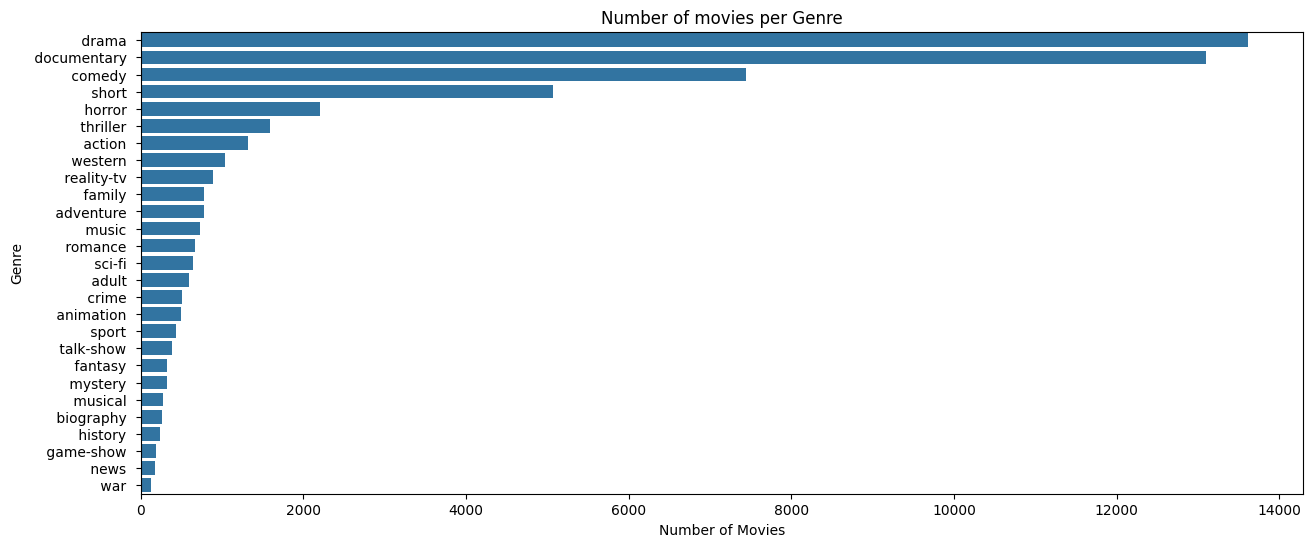

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.countplot(y=df['GENRE'], order = df['GENRE'].value_counts().index)
plt.title('Number of movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show

3. Feature Extraction
Convert the text data into numerical features using TF-IDF.

In [15]:
df_train = df.drop(columns=['ID'],axis=1)
x_test = x_test.drop(columns=['ID'],axis=1)

In [16]:
df_train['combined_text'] = df_train['TITLE'] + ' ' + df_train['DESCRIPTION']
x_test['combined_text'] = x_test['TITLE'] + ' ' + x_test['DESCRIPTION']

In [17]:
X_train = df_train.drop(['GENRE','DESCRIPTION','TITLE'],axis=1)
y_train = df_train['GENRE']
X_test = x_test.drop(['DESCRIPTION','TITLE'],axis=1)
y_test = df_test['GENRE']

In [18]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_vectorizer.fit(X_train['combined_text'])

# Transform the text data into TF-IDF features
X_train = tfidf_vectorizer.transform(df_train['combined_text'])
X_test = tfidf_vectorizer.transform(x_test['combined_text'])

4. Split the Data
Split the data into training and testing sets.

In [19]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


5. Train the Model
We’ll use Logistic Regression for this classification task.

In [20]:
# Initialize the model
model = LogisticRegression(C=1)

# Train the model
model.fit(x_train, y_train)


c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

6. Evaluate the Model
Evaluate the model’s performance on the test set.

In [21]:
# Make predictions
y_pred = model.predict(x_train)

# Evaluate the model
print(classification_report(y_train, y_pred))

c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.65      0.42      0.51      1199
       adult        0.78      0.39      0.52       531
   adventure        0.76      0.25      0.38       702
   animation        0.79      0.21      0.33       437
   biography        0.00      0.00      0.00       238
      comedy        0.62      0.70      0.66      6694
       crime        0.57      0.09      0.16       449
 documentary        0.72      0.90      0.80     11773
       drama        0.62      0.84      0.71     12262
      family        0.69      0.17      0.27       720
     fantasy        0.72      0.06      0.12       286
   game-show        0.92      0.62      0.74       176
     history        0.00      0.00      0.00       219
      horror        0.76      0.71      0.73      1996
       music        0.74      0.54      0.63       651
     musical        0.76      0.10      0.17       256
     mystery        0.76      0.08      0.14       291
        n

c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7. Make Predictions
Use the model to make predictions on new data.

In [22]:
Uji_test = tfidf_vectorizer.transform(x_test['DESCRIPTION'])
x_test['PREDICTED_GENRE'] = model.predict(Uji_test)

# Save the output
output_path = r'C:\\Users\\Dwi Fitria\\Intern\\Encryptix\\output_test_data.txt'
x_test.to_csv(output_path, sep='|', index=False, header=False)

In [23]:
x_test.head()

,TITLE,DESCRIPTION,combined_text,PREDICTED_GENRE
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",Edgar's Lunch (1998) L.R. Brane loves his l...,short
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...","La guerra de papá (1977) Spain, March 1964:...",drama
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,Off the Beaten Track (2010) One year in the...,documentary
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...","Meu Amigo Hindu (2015) His father has died,...",drama
4,Er nu zhai (1955),Before he was known internationally as a mart...,Er nu zhai (1955) Before he was known inter...,drama
